In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error,r2_score

# Data collection and processing

# Loading the csv data to a pandas dataframe 

In [2]:
 gold= pd.read_csv("Gold.csv")

In [3]:
print(gold)

          Date  Gold_Price  Crude_Oil  Interest_Rate    USD_INR    Sensex  \
0    1/10/2000        4538    1455.51           8.00  46.318297   3711.02   
1    1/11/2000        4483    1512.47           8.00  46.783613   3997.99   
2    1/12/2000        4541    1178.11           8.00  46.745856   3972.12   
3     1/1/2001        4466    1208.18           8.00  46.536033   4326.72   
4     1/2/2001        4370    1267.18           7.50  46.514595   4247.04   
..         ...         ...        ...            ...        ...       ...   
234   1/4/2020       45504    1603.02           4.65  76.222334  33717.62   
235   1/5/2020       46343    2298.55           4.25  75.666063  32424.10   
236   1/6/2020       47315    2987.46           4.25  75.763427  34915.80   
237   1/7/2020       49878    3156.01           4.25  74.908993  37606.89   
238   1/8/2020       52917    3243.75           4.25  74.573820  38628.29   

        CPI  USD_Index  
0     37.23     116.65  
1     37.31     115.24  


# print the first 5 rows of dataframe

In [4]:
gold.head()

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,1/10/2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,1/11/2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,1/12/2000,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,1/1/2001,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,1/2/2001,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


# #print last 5 rows of dataframe 

In [5]:
gold.tail()

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
234,1/4/2020,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57
235,1/5/2020,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34
236,1/6/2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39
237,1/7/2020,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35
238,1/8/2020,52917,3243.75,4.25,74.573820,38628.29,129.30,92.14


# numbers of rows and colume

In [6]:
gold.shape 

(239, 8)

In [7]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           239 non-null    object 
 1   Gold_Price     239 non-null    int64  
 2   Crude_Oil      239 non-null    float64
 3   Interest_Rate  239 non-null    float64
 4   USD_INR        239 non-null    float64
 5   Sensex         239 non-null    float64
 6   CPI            239 non-null    float64
 7   USD_Index      239 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.1+ KB


In [8]:
gold.keys()

Index(['Date', 'Gold_Price', 'Crude_Oil', 'Interest_Rate', 'USD_INR', 'Sensex',
       'CPI', 'USD_Index'],
      dtype='object')

# getthing statical mesure of data 

In [9]:
gold.describe()

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,19299.062762,3397.686318,6.715900,53.804819,18172.443891,73.372050,90.182510
std,11668.913490,1551.627401,1.188309,10.311144,11032.206600,29.106141,11.312607
min,4267.000000,887.420000,4.250000,39.366685,2811.600000,36.730000,71.800000
25%,6712.500000,2180.695000,6.000000,45.467395,8263.400000,45.190000,81.110000
50%,19056.000000,3303.550000,6.000000,48.664774,17464.810000,68.470000,88.940000
75%,29364.000000,4492.930000,7.000000,63.861030,26662.395000,101.370000,97.160000
max,52917.000000,6926.830000,10.250000,76.222334,41253.740000,129.300000,120.240000


In [10]:
gold.isnull().sum()

Date             0
Gold_Price       0
Crude_Oil        0
Interest_Rate    0
USD_INR          0
Sensex           0
CPI              0
USD_Index        0
dtype: int64

# Correlation:

#Positive Relation
#Negative Relation

In [11]:
correlation = gold.corr()

# Construting the heatmap to understand the correlation 

<AxesSubplot:>

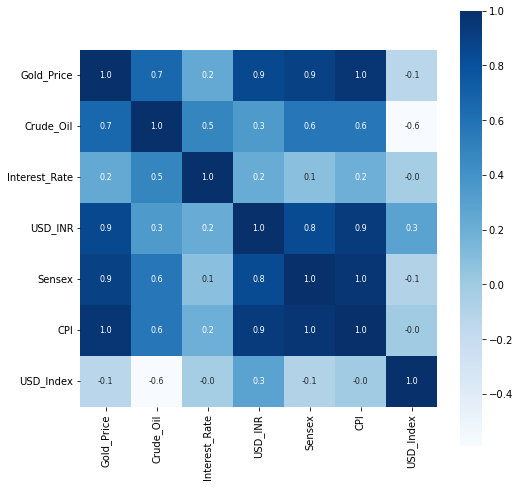

In [12]:
plt.figure(figsize = (8,8)) 
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
print(correlation['Gold_Price'])

Gold_Price       1.000000
Crude_Oil        0.661690
Interest_Rate    0.241996
USD_INR          0.855555
Sensex           0.897490
CPI              0.959048
USD_Index       -0.132789
Name: Gold_Price, dtype: float64


# Checking the distribution of the Gold price

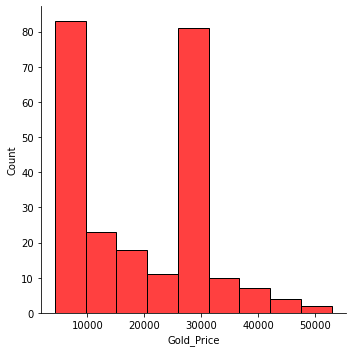

In [14]:
sns.displot(gold['Gold_Price'], color='red')

# Splitting the Freatures and Target


In [15]:
# Seperating X (independent) and y (dependent) variables:
X = gold.drop(['Date','Gold_Price'], axis=1)
Y = gold['Gold_Price']

# print(X)

In [16]:
print(X)

     Crude_Oil  Interest_Rate    USD_INR    Sensex     CPI  USD_Index
0      1455.51           8.00  46.318297   3711.02   37.23     116.65
1      1512.47           8.00  46.783613   3997.99   37.31     115.24
2      1178.11           8.00  46.745856   3972.12   36.98     109.56
3      1208.18           8.00  46.536033   4326.72   36.90     110.52
4      1267.18           7.50  46.514595   4247.04   36.73     112.01
..         ...            ...        ...       ...     ...        ...
234    1603.02           4.65  76.222334  33717.62  125.85      99.57
235    2298.55           4.25  75.666063  32424.10  126.24      98.34
236    2987.46           4.25  75.763427  34915.80  127.00      97.39
237    3156.01           4.25  74.908993  37606.89  128.53      93.35
238    3243.75           4.25  74.573820  38628.29  129.30      92.14

[239 rows x 6 columns]


In [17]:
df_2=pd.DataFrame(X,columns=['Crude_Oil','Interest_Rate','USD_INR','Sensex','CPI','USD_Index'])
df_2

,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,1455.51,8.00,46.318297,3711.02,37.23,116.65
1,1512.47,8.00,46.783613,3997.99,37.31,115.24
2,1178.11,8.00,46.745856,3972.12,36.98,109.56
3,1208.18,8.00,46.536033,4326.72,36.90,110.52
4,1267.18,7.50,46.514595,4247.04,36.73,112.01
...,...,...,...,...,...,...
234,1603.02,4.65,76.222334,33717.62,125.85,99.57
235,2298.55,4.25,75.666063,32424.10,126.24,98.34
236,2987.46,4.25,75.763427,34915.80,127.00,97.39
237,3156.01,4.25,74.908993,37606.89,128.53,93.35


In [18]:
print(Y)

0       4538
1       4483
2       4541
3       4466
4       4370
       ...  
234    45504
235    46343
236    47315
237    49878
238    52917
Name: Gold_Price, Length: 239, dtype: int64


# Feature Scaling

In [19]:
numeric_features = ['Crude_Oil','Interest_Rate','USD_INR','Sensex','CPI','USD_Index'] 

In [20]:
numeric_transformer = StandardScaler()

In [21]:
preprocessor = ColumnTransformer(transformers=[('numeric_feature', numeric_transformer, numeric_features)])

In [22]:
X_transformed = preprocessor.fit_transform(X)

In [23]:
print(X_transformed)

[[-1.25432964  1.08287943 -0.72758503 -1.31358791 -1.24433877  2.34455556]
 [-1.21754276  1.08287943 -0.68236284 -1.2875213  -1.24158444  2.21965428]
 [-1.43348487  1.08287943 -0.68603229 -1.28987117 -1.25294605  1.71650586]
 ...
 [-0.2649394  -2.07948841  2.13406893  1.52086477  1.8463628   0.63845722]
 [-0.15608355 -2.07948841  2.05102992  1.76530704  1.89903934  0.28058404]
 [-0.09941779 -2.07948841  2.0184558   1.85808481  1.92554976  0.17339926]]


In [24]:
X_transformed.mean()

3.567578589590461e-16

In [25]:
X_transformed.std()

1.0

In [26]:
df_1=pd.DataFrame(X_transformed,columns=['Crude_Oil','Interest_Rate','USD_INR','Sensex','CPI','USD_Index'])

In [27]:
df_1

,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,-1.254330,1.082879,-0.727585,-1.313588,-1.244339,2.344556
1,-1.217543,1.082879,-0.682363,-1.287521,-1.241584,2.219654
2,-1.433485,1.082879,-0.686032,-1.289871,-1.252946,1.716506
3,-1.414065,1.082879,-0.706424,-1.257661,-1.255700,1.801545
4,-1.375960,0.661230,-0.708508,-1.264899,-1.261553,1.933533
...,...,...,...,...,...,...
234,-1.159062,-1.742169,2.178668,1.412029,1.806769,0.831567
235,-0.709863,-2.079488,2.124607,1.294534,1.820197,0.722611
236,-0.264939,-2.079488,2.134069,1.520865,1.846363,0.638457
237,-0.156084,-2.079488,2.051030,1.765307,1.899039,0.280584


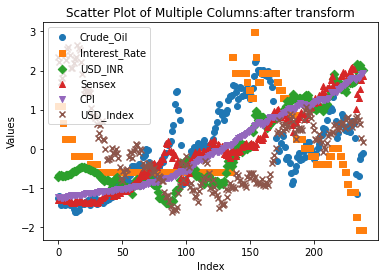

In [28]:
 #Assuming you have a DataFrame named 'df_1' with the columns you want to plot

# Define symbols for each column
symbols = ['o', 's', 'D', '^', 'v','x']  
# Plotting each column with a unique symbol
for i, column in enumerate(df_1.columns):
    plt.scatter(df_1.index, df_1[column], marker=symbols[i % len(symbols)], label=column)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of Multiple Columns:after transform' )
# Show the legend
plt.legend()
# Display the plot
plt.show()

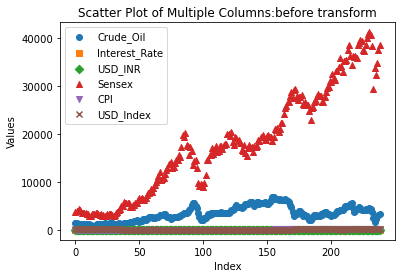

In [29]:
 #Assuming you have a DataFrame named 'df_1' with the columns you want to plot

# Define symbols for each column
symbols = ['o', 's', 'D', '^', 'v','x']  
# Create the second scatter plot
for j, column in enumerate(df_2.columns):  # Change the range to select the desired columns
    plt.scatter(df_2.index, df_2[column], marker=symbols[j % len(symbols)], label=column)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of Multiple Columns:before transform' )

# Show the legend
plt.legend()

# Display the plot
plt.show()

# Splitting into Train data and Test data

In [30]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Training : Randome Forest Regression

In [31]:
regressor = RandomForestRegressor(n_estimators=100)

# Training the model 

In [32]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evalution

# Prediction on test data 

In [33]:
test_data_prediction = regressor.predict(X_test)

In [34]:
print(test_data_prediction)

[ 5207.66  4478.04 12089.62 17055.89 14505.73 26778.23 29445.03 10256.41
  4486.47 29488.11  6119.39 30056.91 17497.4  28223.07 17436.35 39737.31
 26199.77  4787.21 31971.33 20978.63 21934.73  4969.99 44390.41  5466.85
 26493.86 30432.65  4550.51 27605.15 45798.7  28784.79 13902.44 30304.77
  5378.26 26195.01  4921.12  9227.87 30564.08  6182.11  8941.56 28553.34
 37295.33 17074.13 28655.81  4853.23 30051.64  8743.39 29415.56  6066.46]


# # Model accuracy and Performance

In [35]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error :", error_score)

R Squared error : 0.9956351715409509


# Mean_squared_error,Mean_absolute_error,Mean_absolute_percentage_error

In [36]:
mse = mean_squared_error(Y_test,test_data_prediction)
mae = mean_absolute_error(Y_test,test_data_prediction)
mape = mean_absolute_percentage_error(Y_test,test_data_prediction)
print('MSE(mean_squared_error(): ',mse)
print('MAE(mean_absolute_error): ',mae)
print('MAPE(mean_absolute_percentage_error): ',mape)

MSE(mean_squared_error():  637355.7438604165
MAE(mean_absolute_error):  578.9564583333332
MAPE(mean_absolute_percentage_error):  0.028950097483264537


# Calculate the Accuracy score

In [37]:
accuracy=(100-mape)
print("Random forest Regression Model Accuracy:", accuracy)

Random forest Regression Model Accuracy: 99.97104990251674


In [38]:
Y_test = list(Y_test)

In [39]:
print(Y_test)

[5210, 4267, 13028, 17057, 14639, 27075, 28823, 10311, 4380, 30180, 6059, 29399, 16693, 26963, 16614, 38122, 28252, 4693, 33217, 20835, 22130, 5226, 45504, 5192, 27093, 31251, 4449, 28818, 47315, 27178, 12691, 30097, 5243, 25648, 5041, 9559, 31116, 6030, 8878, 29265, 37356, 16525, 27743, 4901, 30473, 8985, 27427, 6094]


# Visualization of actual and predicted data

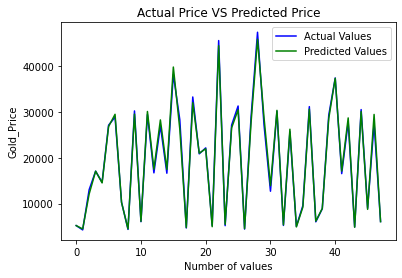

In [40]:
plt.plot(Y_test, color='blue' , label = 'Actual Values')
plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold_Price')
plt.legend()
plt.show()

In [41]:
pd.to_numeric(test_data_prediction)

array([ 5207.66,  4478.04, 12089.62, 17055.89, 14505.73, 26778.23,
       29445.03, 10256.41,  4486.47, 29488.11,  6119.39, 30056.91,
       17497.4 , 28223.07, 17436.35, 39737.31, 26199.77,  4787.21,
       31971.33, 20978.63, 21934.73,  4969.99, 44390.41,  5466.85,
       26493.86, 30432.65,  4550.51, 27605.15, 45798.7 , 28784.79,
       13902.44, 30304.77,  5378.26, 26195.01,  4921.12,  9227.87,
       30564.08,  6182.11,  8941.56, 28553.34, 37295.33, 17074.13,
       28655.81,  4853.23, 30051.64,  8743.39, 29415.56,  6066.46])

In [42]:
df=pd.DataFrame(test_data_prediction, columns=['Predicted gold price'])
print(df)

    Predicted gold price
0                5207.66
1                4478.04
2               12089.62
3               17055.89
4               14505.73
5               26778.23
6               29445.03
7               10256.41
8                4486.47
9               29488.11
10               6119.39
11              30056.91
12              17497.40
13              28223.07
14              17436.35
15              39737.31
16              26199.77
17               4787.21
18              31971.33
19              20978.63
20              21934.73
21               4969.99
22              44390.41
23               5466.85
24              26493.86
25              30432.65
26               4550.51
27              27605.15
28              45798.70
29              28784.79
30              13902.44
31              30304.77
32               5378.26
33              26195.01
34               4921.12
35               9227.87
36              30564.08
37               6182.11
38               8941.56


# Hyperparameters and their possible values for tuning

In [43]:
param_grid = {
    'n_estimators': [150, 200, 300],  # Number of trees in the random forest
    'max_depth': [4, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, Y_train)

# Make predictions on the testing set using the best model
Y_pred = best_model.predict(X_test)

# Calculate the R-squared score of the best model
r2 = r2_score(Y_test, Y_pred)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", best_params)
print("Best Score: ", best_score)
print("R-squared score: ", r2)

Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.9928198164992361
R-squared score:  0.9961614700673176


In [44]:
regressor1 = RandomForestRegressor(n_estimators=200)

In [45]:
regressor1.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200)

In [46]:
test_data_prediction_1 = regressor1.predict(X_test)

In [47]:
print(test_data_prediction_1)

[ 5204.16   4469.325 12078.35  16877.705 14576.07  26755.24  29470.37
 10249.25   4474.71  29565.17   6094.625 30120.655 17520.445 28136.505
 17478.35  39803.23  26658.05   4776.81  31730.35  20809.37  21810.735
  5010.715 45210.3    5473.9   26504.08  30430.565  4530.18  27832.18
 46672.165 28776.42  13989.96  30512.715  5345.71  26102.815  4927.115
  9176.82  30618.305  6153.36   8979.62  28733.08  37319.765 17189.815
 28683.455  4866.565 29878.695  8595.215 29358.015  6083.16 ]


In [48]:
mse = mean_squared_error(Y_test,test_data_prediction_1)
mae = mean_absolute_error(Y_test,test_data_prediction_1)
mape = mean_absolute_percentage_error(Y_test,test_data_prediction_1)
print('MSE(mean_squared_error(): ',mse)
print('MAE(mean_absolute_error): ',mae)
print('MAPE(mean_absolute_percentage_error): ',mape)

MSE(mean_squared_error():  550902.0362130208
MAE(mean_absolute_error):  543.4336458333332
MAPE(mean_absolute_percentage_error):  0.028061442318773024


In [49]:
accuracy_1=(100-mape)
print("Accuracy:", accuracy_1)

Accuracy: 99.97193855768123


In [50]:
Y_test = list(Y_test)

In [51]:
print(Y_test)

[5210, 4267, 13028, 17057, 14639, 27075, 28823, 10311, 4380, 30180, 6059, 29399, 16693, 26963, 16614, 38122, 28252, 4693, 33217, 20835, 22130, 5226, 45504, 5192, 27093, 31251, 4449, 28818, 47315, 27178, 12691, 30097, 5243, 25648, 5041, 9559, 31116, 6030, 8878, 29265, 37356, 16525, 27743, 4901, 30473, 8985, 27427, 6094]


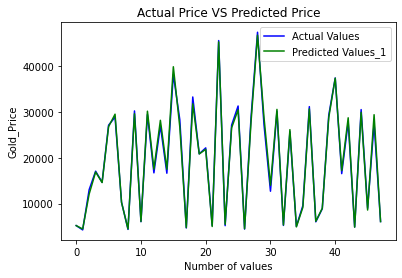

In [52]:
plt.plot(Y_test, color='blue' , label = 'Actual Values')
plt.plot(test_data_prediction_1, color='green', label='Predicted Values_1')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold_Price')
plt.legend()
plt.show()

In [53]:
pd.to_numeric(test_data_prediction_1)

array([ 5204.16 ,  4469.325, 12078.35 , 16877.705, 14576.07 , 26755.24 ,
       29470.37 , 10249.25 ,  4474.71 , 29565.17 ,  6094.625, 30120.655,
       17520.445, 28136.505, 17478.35 , 39803.23 , 26658.05 ,  4776.81 ,
       31730.35 , 20809.37 , 21810.735,  5010.715, 45210.3  ,  5473.9  ,
       26504.08 , 30430.565,  4530.18 , 27832.18 , 46672.165, 28776.42 ,
       13989.96 , 30512.715,  5345.71 , 26102.815,  4927.115,  9176.82 ,
       30618.305,  6153.36 ,  8979.62 , 28733.08 , 37319.765, 17189.815,
       28683.455,  4866.565, 29878.695,  8595.215, 29358.015,  6083.16 ])

In [54]:
df=pd.DataFrame(test_data_prediction_1, columns=['Predicted gold price'])
print(df)

    Predicted gold price
0               5204.160
1               4469.325
2              12078.350
3              16877.705
4              14576.070
5              26755.240
6              29470.370
7              10249.250
8               4474.710
9              29565.170
10              6094.625
11             30120.655
12             17520.445
13             28136.505
14             17478.350
15             39803.230
16             26658.050
17              4776.810
18             31730.350
19             20809.370
20             21810.735
21              5010.715
22             45210.300
23              5473.900
24             26504.080
25             30430.565
26              4530.180
27             27832.180
28             46672.165
29             28776.420
30             13989.960
31             30512.715
32              5345.710
33             26102.815
34              4927.115
35              9176.820
36             30618.305
37              6153.360
38              8979.620


#  Hyperparameters  Tuning

In [55]:
param_grid = {
    'n_estimators': [150, 200, 300],  # Number of trees in the random forest
    'max_depth': [4, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Create an instance of the Random Forest regression model
regressor_1= RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=regressor_1, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, Y_train)

# Make predictions on the testing set using the best model
Y_pred = best_model.predict(X_test)

# Calculate the R-squared score of the best model
r2 = r2_score(Y_test, Y_pred)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", best_params)
print("Best Score: ", best_score)
print("R-squared score: ", r2)


Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score:  0.9926017219652188
R-squared score:  0.9963902926565512


In [56]:
regressor_1.fit(X_train,Y_train)

RandomForestRegressor()

In [57]:
test_data_prediction_2 = regressor_1.predict(X_test)

In [58]:
 print(test_data_prediction_2)

[ 5212.55  4476.01 12149.05 16847.27 14571.1  26871.56 29494.63 10359.79
  4464.74 29691.91  6087.53 29989.09 17451.55 28105.88 17453.79 39729.34
 26707.55  4786.22 31775.11 21010.29 21815.65  4958.34 44531.08  5452.6
 26630.84 30614.41  4528.09 27919.85 46439.79 28720.5  13674.25 30493.87
  5314.03 26239.49  4889.95  9179.24 30468.38  6176.65  9068.7  28653.2
 37606.2  17016.27 28484.35  4839.54 30149.8   8677.69 29467.27  6022.74]


# Mean_squared_error,Mean_absolute_error,Mean_absolute_percentage_error

In [59]:
error_score = metrics.r2_score(Y_test, test_data_prediction_2)
print("R Squared error :", error_score)

R Squared error : 0.996417162726296


In [60]:
mse_1 = mean_squared_error(Y_test,test_data_prediction_2)
mae_1 = mean_absolute_error(Y_test,test_data_prediction_2)
mape_1 = mean_absolute_percentage_error(Y_test,test_data_prediction_2)
print('MSE(mean_squared_error(): ',mse_1)
print('MAE(mean_absolute_error): ',mae_1)
print('MAPE(mean_absolute_percentage_error): ',mape_1)

MSE(mean_squared_error():  523168.76531041646
MAE(mean_absolute_error):  538.5964583333332
MAPE(mean_absolute_percentage_error):  0.027631127309157368


# Calculate the accuracy score

In [61]:
accuracy=(100-mape_1)
print("Accuracy:", accuracy)

Accuracy: 99.97236887269084


In [62]:
Y_test = list(Y_test)

In [63]:
print(Y_test)

[5210, 4267, 13028, 17057, 14639, 27075, 28823, 10311, 4380, 30180, 6059, 29399, 16693, 26963, 16614, 38122, 28252, 4693, 33217, 20835, 22130, 5226, 45504, 5192, 27093, 31251, 4449, 28818, 47315, 27178, 12691, 30097, 5243, 25648, 5041, 9559, 31116, 6030, 8878, 29265, 37356, 16525, 27743, 4901, 30473, 8985, 27427, 6094]


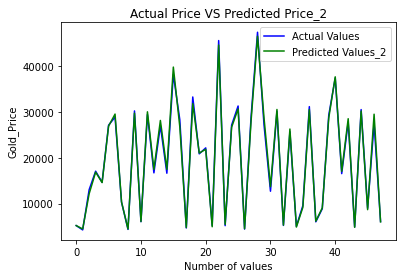

In [64]:
plt.plot(Y_test, color='blue' , label = 'Actual Values')
plt.plot(test_data_prediction_2, color='green', label='Predicted Values_2')
plt.title('Actual Price VS Predicted Price_2')
plt.xlabel('Number of values')
plt.ylabel('Gold_Price')
plt.legend()
plt.show()

In [65]:
pd.to_numeric(test_data_prediction_2)

array([ 5212.55,  4476.01, 12149.05, 16847.27, 14571.1 , 26871.56,
       29494.63, 10359.79,  4464.74, 29691.91,  6087.53, 29989.09,
       17451.55, 28105.88, 17453.79, 39729.34, 26707.55,  4786.22,
       31775.11, 21010.29, 21815.65,  4958.34, 44531.08,  5452.6 ,
       26630.84, 30614.41,  4528.09, 27919.85, 46439.79, 28720.5 ,
       13674.25, 30493.87,  5314.03, 26239.49,  4889.95,  9179.24,
       30468.38,  6176.65,  9068.7 , 28653.2 , 37606.2 , 17016.27,
       28484.35,  4839.54, 30149.8 ,  8677.69, 29467.27,  6022.74])

In [66]:
df_1=pd.DataFrame(test_data_prediction_2, columns=['Predicted gold price'])
print(df_1)

    Predicted gold price
0                5212.55
1                4476.01
2               12149.05
3               16847.27
4               14571.10
5               26871.56
6               29494.63
7               10359.79
8                4464.74
9               29691.91
10               6087.53
11              29989.09
12              17451.55
13              28105.88
14              17453.79
15              39729.34
16              26707.55
17               4786.22
18              31775.11
19              21010.29
20              21815.65
21               4958.34
22              44531.08
23               5452.60
24              26630.84
25              30614.41
26               4528.09
27              27919.85
28              46439.79
29              28720.50
30              13674.25
31              30493.87
32               5314.03
33              26239.49
34               4889.95
35               9179.24
36              30468.38
37               6176.65
38               9068.70


# Linear Regressoin

In [67]:
linear_model = LinearRegression(positive=True)
linear_model.fit(X_train, Y_train)

LinearRegression(positive=True)

# Prediction linear regression model

In [68]:
linear_predictions = linear_model.predict(X_test)

In [69]:
print(linear_predictions)

[ 5055.20029762  3769.63454814 16515.34106849 16586.90877707
 14180.86389007 27239.8175128  30083.84003317 12071.49136701
  4136.30126064 25926.90145422  6523.68896469 32504.56084993
 17047.95169429 30944.58867684 16838.28351769 38318.7428789
 27102.40134041  3877.59084461 35666.22653078 20722.23595215
 20923.64481903  4524.37737262 34325.58229762  5040.63310625
 28781.9764208  34082.683581    4293.18907852 28517.44397876
 36818.35963027 28074.32562581 13885.64593979 35861.87607447
  4888.48935877 28596.75632806  4418.97553416 10527.64691577
 34262.32488588  7314.09010663 10100.06981571 30328.81700622
 36964.3001922  16618.36982879 26756.56471846  3922.37449865
 30665.20203992  9539.00912205 31005.53662354  5526.69349789]


# Evaluate linear regression mode

In [70]:
error_score = metrics.r2_score(Y_test, linear_predictions)
print("R Squared error :", error_score)

R Squared error : 0.9439155822229386


In [71]:
mse = mean_squared_error(Y_test,linear_predictions)
mae = mean_absolute_error(Y_test,linear_predictions)
mape_l = mean_absolute_percentage_error(Y_test,linear_predictions)
print('MSE: ',mse)
print('MAE: ',mae)
print('MAPE: ',mape)

MSE:  8189491.556574301
MAE:  1690.1082700189863
MAPE:  0.028061442318773024


# Accuracy

In [72]:
acc_l=(100-mape_l)
print("Linear Regression model Accuracy:", acc_l)

Linear Regression model Accuracy: 99.9126203510847


In [73]:
Y_test=list(Y_test)
print(Y_test)

[5210, 4267, 13028, 17057, 14639, 27075, 28823, 10311, 4380, 30180, 6059, 29399, 16693, 26963, 16614, 38122, 28252, 4693, 33217, 20835, 22130, 5226, 45504, 5192, 27093, 31251, 4449, 28818, 47315, 27178, 12691, 30097, 5243, 25648, 5041, 9559, 31116, 6030, 8878, 29265, 37356, 16525, 27743, 4901, 30473, 8985, 27427, 6094]


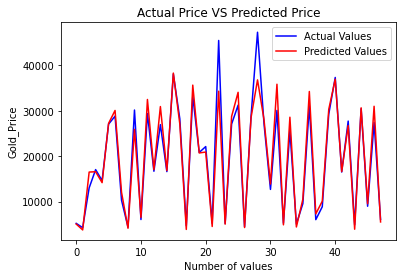

In [74]:
plt.plot(Y_test, color='blue' , label = 'Actual Values')
plt.plot(linear_predictions, color='red', label='Predicted Values')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold_Price')
plt.legend()
plt.show()

In [75]:
df=pd.DataFrame(linear_predictions, columns=['Predicted gold price'])
print(df)

    Predicted gold price
0            5055.200298
1            3769.634548
2           16515.341068
3           16586.908777
4           14180.863890
5           27239.817513
6           30083.840033
7           12071.491367
8            4136.301261
9           25926.901454
10           6523.688965
11          32504.560850
12          17047.951694
13          30944.588677
14          16838.283518
15          38318.742879
16          27102.401340
17           3877.590845
18          35666.226531
19          20722.235952
20          20923.644819
21           4524.377373
22          34325.582298
23           5040.633106
24          28781.976421
25          34082.683581
26           4293.189079
27          28517.443979
28          36818.359630
29          28074.325626
30          13885.645940
31          35861.876074
32           4888.489359
33          28596.756328
34           4418.975534
35          10527.646916
36          34262.324886
37           7314.090107
38          10100.069816


# Decision Tree Regression

In [76]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)

DecisionTreeRegressor()

# Predict using decision tree regression  

In [77]:
tree_predictions = tree_model.predict(X_test)

In [78]:
print(tree_predictions)

[ 5239.  4269. 12143. 17159. 14720. 26115. 28170. 11291.  4576. 29819.
  6058. 30986. 16706. 26991. 16706. 41195. 25998.  4920. 32230. 21470.
 21470.  5188. 46343.  5363. 25539. 30071.  4631. 28794. 46343. 28008.
 14621. 29644.  5444. 25207.  5188.  9469. 30707.  6361.  9370. 28746.
 34522. 16706. 28008.  4920. 30211.  8952. 29329.  6179.]


# Evaluate decision tree mode

In [79]:
error_score = metrics.r2_score(Y_test,tree_predictions)
print("R Squared error :", error_score)

R Squared error : 0.99354882518291


In [80]:
mse = mean_squared_error(Y_test,tree_predictions)
mae = mean_absolute_error(Y_test,tree_predictions)
mape_d = mean_absolute_percentage_error(Y_test,tree_predictions)
print('MSE(mean_squared_error): ',mse)
print('MAE(mean_absolute_error): ',mae)
print('MAPE(mean_absolute_percentage_error): ',mape)

MSE(mean_squared_error):  942005.7083333334
MAE(mean_absolute_error):  628.9583333333334
MAPE(mean_absolute_percentage_error):  0.028061442318773024


# Accuracy

In [81]:
acc_d=(100-mape_d)
print("Decision Tree model Accuracy:", acc_d)

Decision Tree model Accuracy: 99.96874072864291


In [82]:
Y_test=list(Y_test)
print(Y_test)

[5210, 4267, 13028, 17057, 14639, 27075, 28823, 10311, 4380, 30180, 6059, 29399, 16693, 26963, 16614, 38122, 28252, 4693, 33217, 20835, 22130, 5226, 45504, 5192, 27093, 31251, 4449, 28818, 47315, 27178, 12691, 30097, 5243, 25648, 5041, 9559, 31116, 6030, 8878, 29265, 37356, 16525, 27743, 4901, 30473, 8985, 27427, 6094]


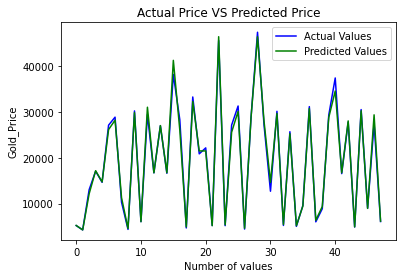

In [83]:
plt.plot(Y_test, color='blue' , label = 'Actual Values')
plt.plot(tree_predictions, color='green', label='Predicted Values')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold_Price')
plt.legend()
plt.show()

In [84]:
df=pd.DataFrame(tree_predictions, columns=['Predicted gold price'])
print(df)

    Predicted gold price
0                 5239.0
1                 4269.0
2                12143.0
3                17159.0
4                14720.0
5                26115.0
6                28170.0
7                11291.0
8                 4576.0
9                29819.0
10                6058.0
11               30986.0
12               16706.0
13               26991.0
14               16706.0
15               41195.0
16               25998.0
17                4920.0
18               32230.0
19               21470.0
20               21470.0
21                5188.0
22               46343.0
23                5363.0
24               25539.0
25               30071.0
26                4631.0
27               28794.0
28               46343.0
29               28008.0
30               14621.0
31               29644.0
32                5444.0
33               25207.0
34                5188.0
35                9469.0
36               30707.0
37                6361.0
38                9370.0


# Training model performance visualization

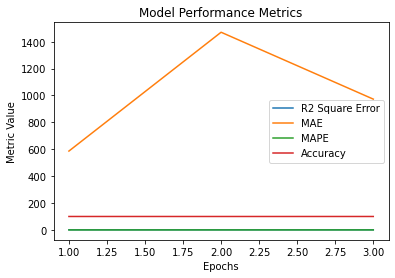

In [85]:
# Example metric values
epochs = [1, 2, 3]  # Example epochs
r2_values = [0.99281,0.97350,0.98502] 
mae_values = [586.425,1470.1910,972.75]  
mape_values = [0.02899,0.10251,0.10251]  
accuracy_values = [99.9710,99.8974,99.94806]  


# Create the graph
plt.plot(epochs, r2_values, label='R2 Square Error')
plt.plot(epochs, mae_values, label='MAE')
plt.plot(epochs, mape_values, label='MAPE')
plt.plot(epochs, accuracy_values, label='Accuracy')

# Customize the graph
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Model Performance Metrics')
plt.legend()

# Show the graph
plt.show()

In [94]:
new_data = [[62062,4.5 , 110.08 ,6606011.90 , 195.90 ,85],[6305,7.15 , 85.08 ,660604.90 , 190.90 ,99 ],[6402,8,90.02,700705,190.45,99.34]]
g_predictions =linear_model.predict(new_data)
print(g_predictions)

[149881.07322982  63436.3571846   63431.87091347]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [92]:
g_predictions =linear_model.predict(new_data)
print(g_predictions)

currect_gold_price=regressor_1.predict(new_data )
print(currect_gold_price)

[64974.05030219 63436.3571846  63431.87091347]
[46382.41 38278.28 38257.71]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [88]:
G_predictions = tree_model.predict(new_data)
print(G_predictions)

[46343. 46343. 46343.]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [89]:
G_predictions = tree_model.predict(new_data)
print(G_predictions)

[46343. 46343. 46343.]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
